In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='microsoft/deberta-base'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'wd':[]}

In [4]:

lr = 1.0e-5
weight_decay = [0.1, 0.01]

for wd in weight_decay:
    print(f'Grid search {model_checkpoint}, learning rate {lr}, weight decay {wd}')
    data = ClimateDataset(model_to_train=2,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=wd,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['wd'].append(wd)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search microsoft/deberta-base, learning rate 1e-05, weight decay 0.1


Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler.dense.weight', 'classifier.bias', 'classifier.weight', 'pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	1.0982	Val Loss:	1.0966	Accuracy:	0.3782	F1:	0.1829
2 / 30: Train Loss:	1.0701	Val Loss:	1.0236	Accuracy:	0.3866	F1:	0.2021
3 / 30: Train Loss:	0.9810	Val Loss:	0.9456	Accuracy:	0.5378	F1:	0.4492
4 / 30: Train Loss:	0.8653	Val Loss:	0.7553	Accuracy:	0.7311	F1:	0.7308
5 / 30: Train Loss:	0.6343	Val Loss:	0.6336	Accuracy:	0.7311	F1:	0.7288
6 / 30: Train Loss:	0.4550	Val Loss:	0.6152	Accuracy:	0.7479	F1:	0.7447
7 / 30: Train Loss:	0.2986	Val Loss:	0.5709	Accuracy:	0.7647	F1:	0.7629
8 / 30: Train Loss:	0.1885	Val Loss:	0.5963	Accuracy:	0.8319	F1:	0.8307
9 / 30: Train Loss:	0.1298	Val Loss:	0.6424	Accuracy:	0.8151	F1:	0.8158
10 / 30: Train Loss:	0.0891	Val Loss:	0.5956	Accuracy:	0.8235	F1:	0.8217
11 / 30: Train Loss:	0.0616	Val Loss:	0.6062	Accuracy:	0.8235	F1:	0.8232
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       0.84      0.82      0.83        

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler.dense.weight', 'classifier.bias', 'classifier.weight', 'pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	1.0982	Val Loss:	1.0966	Accuracy:	0.3782	F1:	0.1829
2 / 30: Train Loss:	1.0697	Val Loss:	1.0167	Accuracy:	0.3782	F1:	0.1829
3 / 30: Train Loss:	0.9843	Val Loss:	0.9546	Accuracy:	0.5126	F1:	0.4030
4 / 30: Train Loss:	0.8830	Val Loss:	0.8739	Accuracy:	0.6555	F1:	0.6040
5 / 30: Train Loss:	0.7177	Val Loss:	0.6394	Accuracy:	0.7563	F1:	0.7526
6 / 30: Train Loss:	0.5023	Val Loss:	0.5371	Accuracy:	0.8067	F1:	0.8077
7 / 30: Train Loss:	0.3355	Val Loss:	0.5787	Accuracy:	0.7815	F1:	0.7830
8 / 30: Train Loss:	0.2524	Val Loss:	0.5599	Accuracy:	0.7983	F1:	0.7940
9 / 30: Train Loss:	0.1545	Val Loss:	0.5902	Accuracy:	0.7815	F1:	0.7776
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       0.79      0.79      0.79        38
oversimplification       0.96      0.72      0.83        36
slothful induction       0.74      0.89      0.81        45

          accuracy    

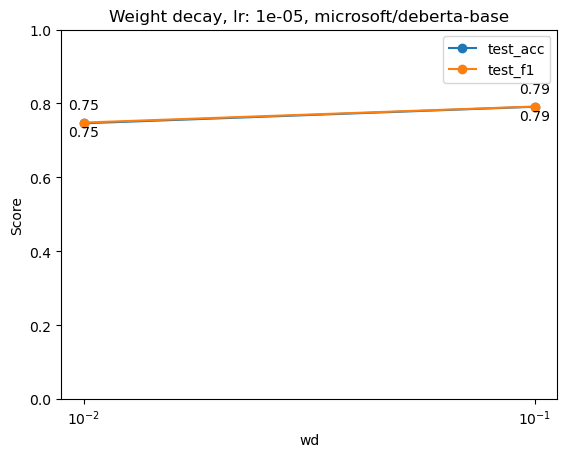

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'Weight decay, lr: {lr}, {model_checkpoint}',
                        column='wd',
                        sci_format=True)

In [6]:
%reset -f